In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read the data
df = pd.read_csv('data.csv')
# Look at the top 5 rows of the data
df.head(10)

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5
5,Awsome sound powerful bass battery backup is a...,5
6,This product sound is clear and excellent bass...,4
7,Should u buy this---Pros:-1. Sound quality and...,4
8,"First of all, I want to talk about sound quali...",5
9,Good looking Super Fine clear Sound and power ...,5


In [3]:
# Understand the data types of the columns
df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9976 non-null   object
 1   rating  9976 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 156.0+ KB


In [4]:
#Looking at the summary of the reviews.
df.review.head(5)

0    It was nice produt. I like it's design a lot. ...
1    awesome sound....very pretty to see this nd th...
2    awesome sound quality. pros 7-8 hrs of battery...
3    I think it is such a good product not only as ...
4    awesome bass sound quality very good bettary l...
Name: review, dtype: object

In [5]:
#Looking at the description of the reviews
df.rating.head(5)

0    5
1    5
2    4
3    5
4    5
Name: rating, dtype: int64

# Text preprocessing

In [6]:
#pip install textblob


In [7]:
# Import libraries
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [8]:
# Lower casing and removing punctuations
df['review'] = df['review'].fillna('').apply(lambda x: " ".join(x.lower() for x in str(x).split()))
df['review'] = df['review'].str.replace('[^\w\s]','')
df.review.head(10)

C:\Users\admin\AppData\Local\Temp\ipykernel_9752\1329948683.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review'] = df['review'].str.replace('[^\w\s]','')


0    it was nice produt i like its design a lot its...
1    awesome soundvery pretty to see this nd the so...
2    awesome sound quality pros 78 hrs of battery l...
3    i think it is such a good product not only as ...
4    awesome bass sound quality very good bettary l...
5    awsome sound powerful bass battery backup is a...
6    this product sound is clear and excellent bass...
7    should u buy thispros1 sound quality and build...
8    first of all i want to talk about sound qualit...
9    good looking super fine clear sound and power ...
Name: review, dtype: object

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
# Removal of stop words
stop = stopwords.words('english')
df['review'] = df['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.review.head(15)

0     nice produt like design lot easy carry looked ...
1     awesome soundvery pretty see nd sound quality ...
2     awesome sound quality pros 78 hrs battery life...
3     think good product per quality also design qui...
4     awesome bass sound quality good bettary long l...
5     awsome sound powerful bass battery backup also...
6     product sound clear excellent bass obviously g...
7     u buy thispros1 sound quality build quality aw...
8     first want talk sound quality sound quality be...
9     good looking super fine clear sound power full...
10    headphone best bass perfect fit fixed headthat...
11    great looks n light weight sound cool design o...
12    using headphone since 6 months great bass song...
13    sound quality good cannot wear 10 minutes sooo...
14    reson 1 star sounds alerts connection low batt...
Name: review, dtype: object

In [11]:
#Create a new data frame "reviews" to perform exploratory data analysis upon that
reviews = df

# Dropping null values
reviews.dropna(inplace=True) 

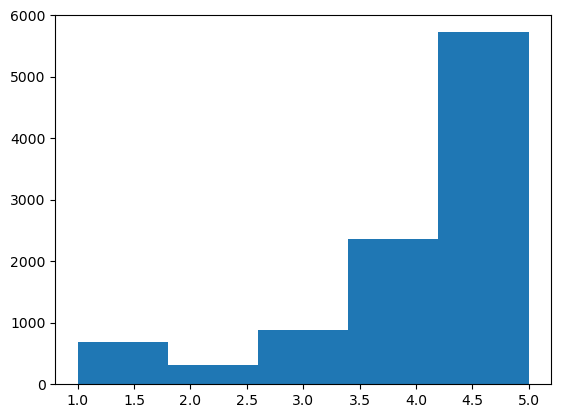

        review
rating        
1          691
2          310
3          884
4         2365
5         5726


In [12]:
# The histogram reveals this dataset is highly unbalanced towards high rating.
reviews.rating.hist(bins=5,grid=False) #bins = axis number value ,grid= layout
plt.show()
print(reviews.groupby('rating').count())

In [13]:
#To make it balanced data, we sampled each score by the lowest n-count from above. (i.e. 29743 reviews scored as '2')
rating_1 = reviews[reviews['rating'] == 1].sample(n=6000, replace=True)
rating_2 = reviews[reviews['rating'] == 2].sample(n=6000, replace=True)
rating_3 = reviews[reviews['rating'] == 3].sample(n=6000, replace=True)
rating_4 = reviews[reviews['rating'] == 4].sample(n=6000, replace=True)
rating_5 = reviews[reviews['rating'] == 5].sample(n=6000, replace=True)

In [14]:
# Here we recreate a 'balanced' dataset.
reviews_sample = pd.concat([rating_1,rating_2,rating_3,rating_4,rating_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

In [15]:
# Printing count by 'Score' to check dataset is now balanced.
print(reviews_sample.groupby('rating').count())

        review
rating        
1         6000
2         6000
3         6000
4         6000
5         6000


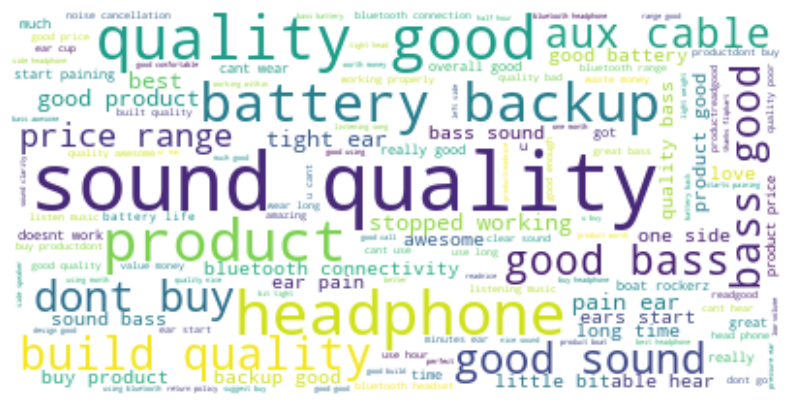

In [16]:
# Let's build a word cloud looking at the 'Summary' text
from wordcloud import WordCloud
from wordcloud import STOPWORDS
# Wordcloud function's input needs to be a single string of text.
# Here I'm concatenating all Summaries into a single string.
# similarly you can build for Text column
reviews_str = reviews_sample.review.str.cat() #cat= the content will be displayed 
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or #5) Reviews.
negative_reviews = reviews_sample[reviews_sample['rating']. isin([1,2]) ] #isin = filter data
positive_reviews = reviews_sample[reviews_sample['rating']. isin([4,5]) ]
# Transform to single string
negative_reviews_str = negative_reviews.review.str.cat()
positive_reviews_str = positive_reviews.review.str.cat()
# Create wordclouds
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)

Text(0.5, 1.0, ' Negative Reviews ')

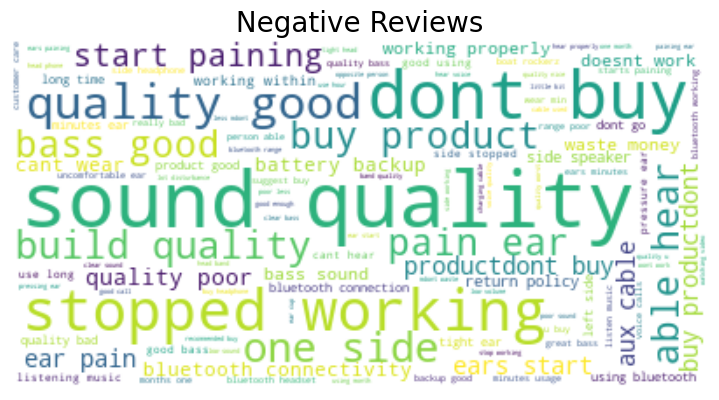

In [18]:
#Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title(' Negative Reviews ',fontsize=20)

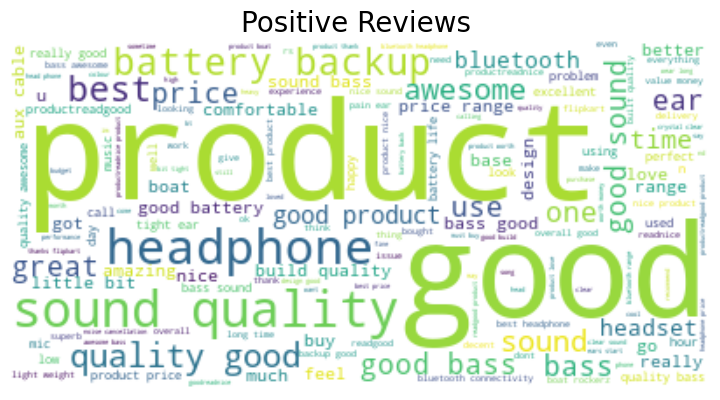

In [19]:
#Plot
fig = plt.figure(figsize=(10,10))
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Positive Reviews ',fontsize=20)
plt.show()

In [20]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')

In [21]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
#pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [23]:
# Function for getting the sentiment
cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [24]:
# Generating sentiment for all the sentence present in the dataset
emptyline=[]
for row in df['review']:
  vs=analyzer.polarity_scores(row)
  emptyline.append(vs)

In [25]:
# Creating new dataframe with sentiments
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head(5)

,neg,neu,pos,compound
0,0.0,0.423,0.577,0.8020
1,0.0,0.349,0.651,0.9501
2,0.0,0.725,0.275,0.9440
3,0.0,0.502,0.498,0.9712
4,0.0,0.501,0.499,0.8992


In [26]:
# Merging the sentiments back to reviews dataframe
df_c = pd.concat([df, df_sentiments], axis=1) #concat=to link together in a series or chain
df_c.head(3)

,review,rating,neg,neu,pos,compound
0,nice produt like design lot easy carry looked ...,5,0.0,0.423,0.577,0.8020
1,awesome soundvery pretty see nd sound quality ...,5,0.0,0.349,0.651,0.9501
2,awesome sound quality pros 78 hrs battery life...,4,0.0,0.725,0.275,0.9440


In [27]:
#Convert scores into positive and negetive sentiments using some threshold
df_c['Sentiment'] = np.where(df_c['compound'] >= 0, 'Positive', 'Negative')
df_c.head(15)

,review,rating,neg,neu,pos,compound,Sentiment
0,nice produt like design lot easy carry looked ...,5,0.000,0.423,0.577,0.8020,Positive
1,awesome soundvery pretty see nd sound quality ...,5,0.000,0.349,0.651,0.9501,Positive
2,awesome sound quality pros 78 hrs battery life...,4,0.000,0.725,0.275,0.9440,Positive
3,think good product per quality also design qui...,5,0.000,0.502,0.498,0.9712,Positive
4,awesome bass sound quality good bettary long l...,5,0.000,0.501,0.499,0.8992,Positive
5,awsome sound powerful bass battery backup also...,5,0.031,0.455,0.515,0.9884,Positive
6,product sound clear excellent bass obviously g...,4,0.000,0.392,0.608,0.9381,Positive
7,u buy thispros1 sound quality build quality aw...,4,0.053,0.790,0.156,0.6597,Positive
8,first want talk sound quality sound quality be...,5,0.070,0.649,0.281,0.9284,Positive
9,good looking super fine clear sound power full...,5,0.000,0.309,0.691,0.8807,Positive


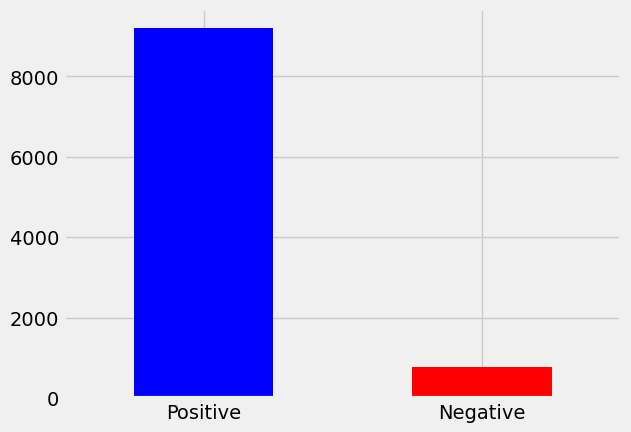

In [28]:
##Business insights
#Let’s see how the overall sentiment is using the sentiment we generated.
result=df_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0,color=['blue', 'red']);